In [12]:
library(tidyverse)
library(tidyr)
library(readxl)

In [13]:
df <- read_xlsx('ict_in_government.xlsx')

In [14]:
respostas <- c(
    'nenhuma',
    '1 de 3',
    '2 de 3',
    'todas'
)

In [15]:
df_2024 <- df %>% 
    filter(Year == 2024) %>%
    mutate(Soma_Respostas_Positivas = Indicator_1 + Indicator_2 + Indicator_3) %>%
    mutate(Total_Respostas = length(Soma_Respostas_Positivas))

In [16]:
df_2024_0 = df_2024 %>%
    filter(Soma_Respostas_Positivas == 0) %>%
    mutate(Quantidade_0_Respostas = length(Soma_Respostas_Positivas)) %>%
    mutate(Porcentagem_0_Respostas = Quantidade_0_Respostas / Total_Respostas) %>%
    select(Porcentagem_0_Respostas)

In [17]:
df_2024_1 = df_2024 %>%
    filter(Soma_Respostas_Positivas == 1) %>%
    mutate(Quantidade_1_Respostas = length(Soma_Respostas_Positivas)) %>%
    mutate(Porcentagem_1_Respostas = Quantidade_1_Respostas / Total_Respostas) %>%
    select(Porcentagem_1_Respostas)

In [18]:
df_2024_2 = df_2024 %>%
    filter(Soma_Respostas_Positivas == 2) %>%
    mutate(Quantidade_2_Respostas = length(Soma_Respostas_Positivas)) %>%
    mutate(Porcentagem_2_Respostas = Quantidade_2_Respostas / Total_Respostas) %>%
    select(Porcentagem_2_Respostas)

In [19]:
df_2024_3 = df_2024 %>%
    filter(Soma_Respostas_Positivas == 3) %>%
    mutate(Quantidade_3_Respostas = length(Soma_Respostas_Positivas)) %>%
    mutate(Porcentagem_3_Respostas = Quantidade_3_Respostas / Total_Respostas) %>%
    select(Porcentagem_3_Respostas)

In [20]:
df_final <- data.frame(
    R0 = unique(df_2024_0$Porcentagem_0_Respostas),
    R1 = unique(df_2024_1$Porcentagem_1_Respostas),
    R2 = unique(df_2024_2$Porcentagem_2_Respostas),
    R3 = unique(df_2024_3$Porcentagem_3_Respostas) 
)

In [21]:
df_longer <- pivot_longer(
    data = df_final,
    cols = everything(),
    names_to = "Quantidade_Respostas_Positivas",
    values_to = "Porcentagem"
)

ticegov_soma_respostas_positivas

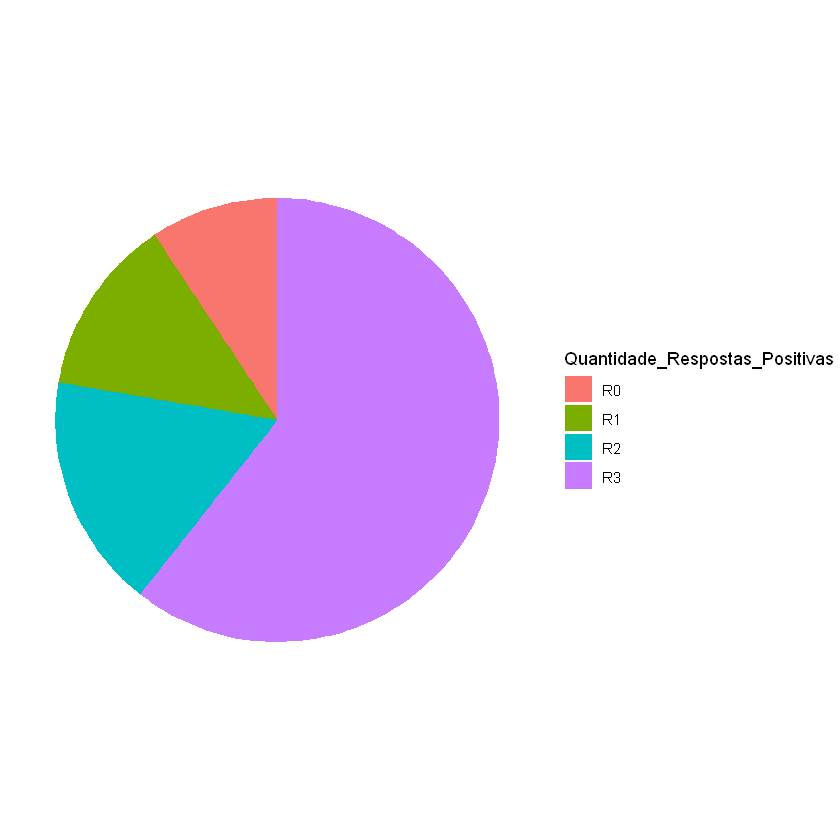

In [ ]:
ggplot(df_longer, aes(x = "", y = Porcentagem, fill = Quantidade_Respostas_Positivas)) +
    geom_bar(stat = "identity", width=1) +
    coord_polar("y", start=0) +
    theme_void() +
    ggsave()